In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
sns.set(color_codes=True)
sns.set(font_scale=1)
sns.set_style("whitegrid")

# Sample mean parameter replications 
dfM = pd.read_csv(r'~/Documents/FMDVMeansMay9.csv')

# Individual host median parameters 
dfInd = pd.read_csv(r'~/Documents/QualCompInd.csv')

In [2]:
dfMViral = dfInd[["Serotype","k","I0","b","delta","r","P0","TimeMax","cumViral","maxViral","infectStart",'A0']]
dfMViral.columns =['ID', 'k', '$I_0$','b','$\delta$','r','$P_0$','T. max', 'Cum. v', "Max v", "Inf s. t.",'$A_0$']

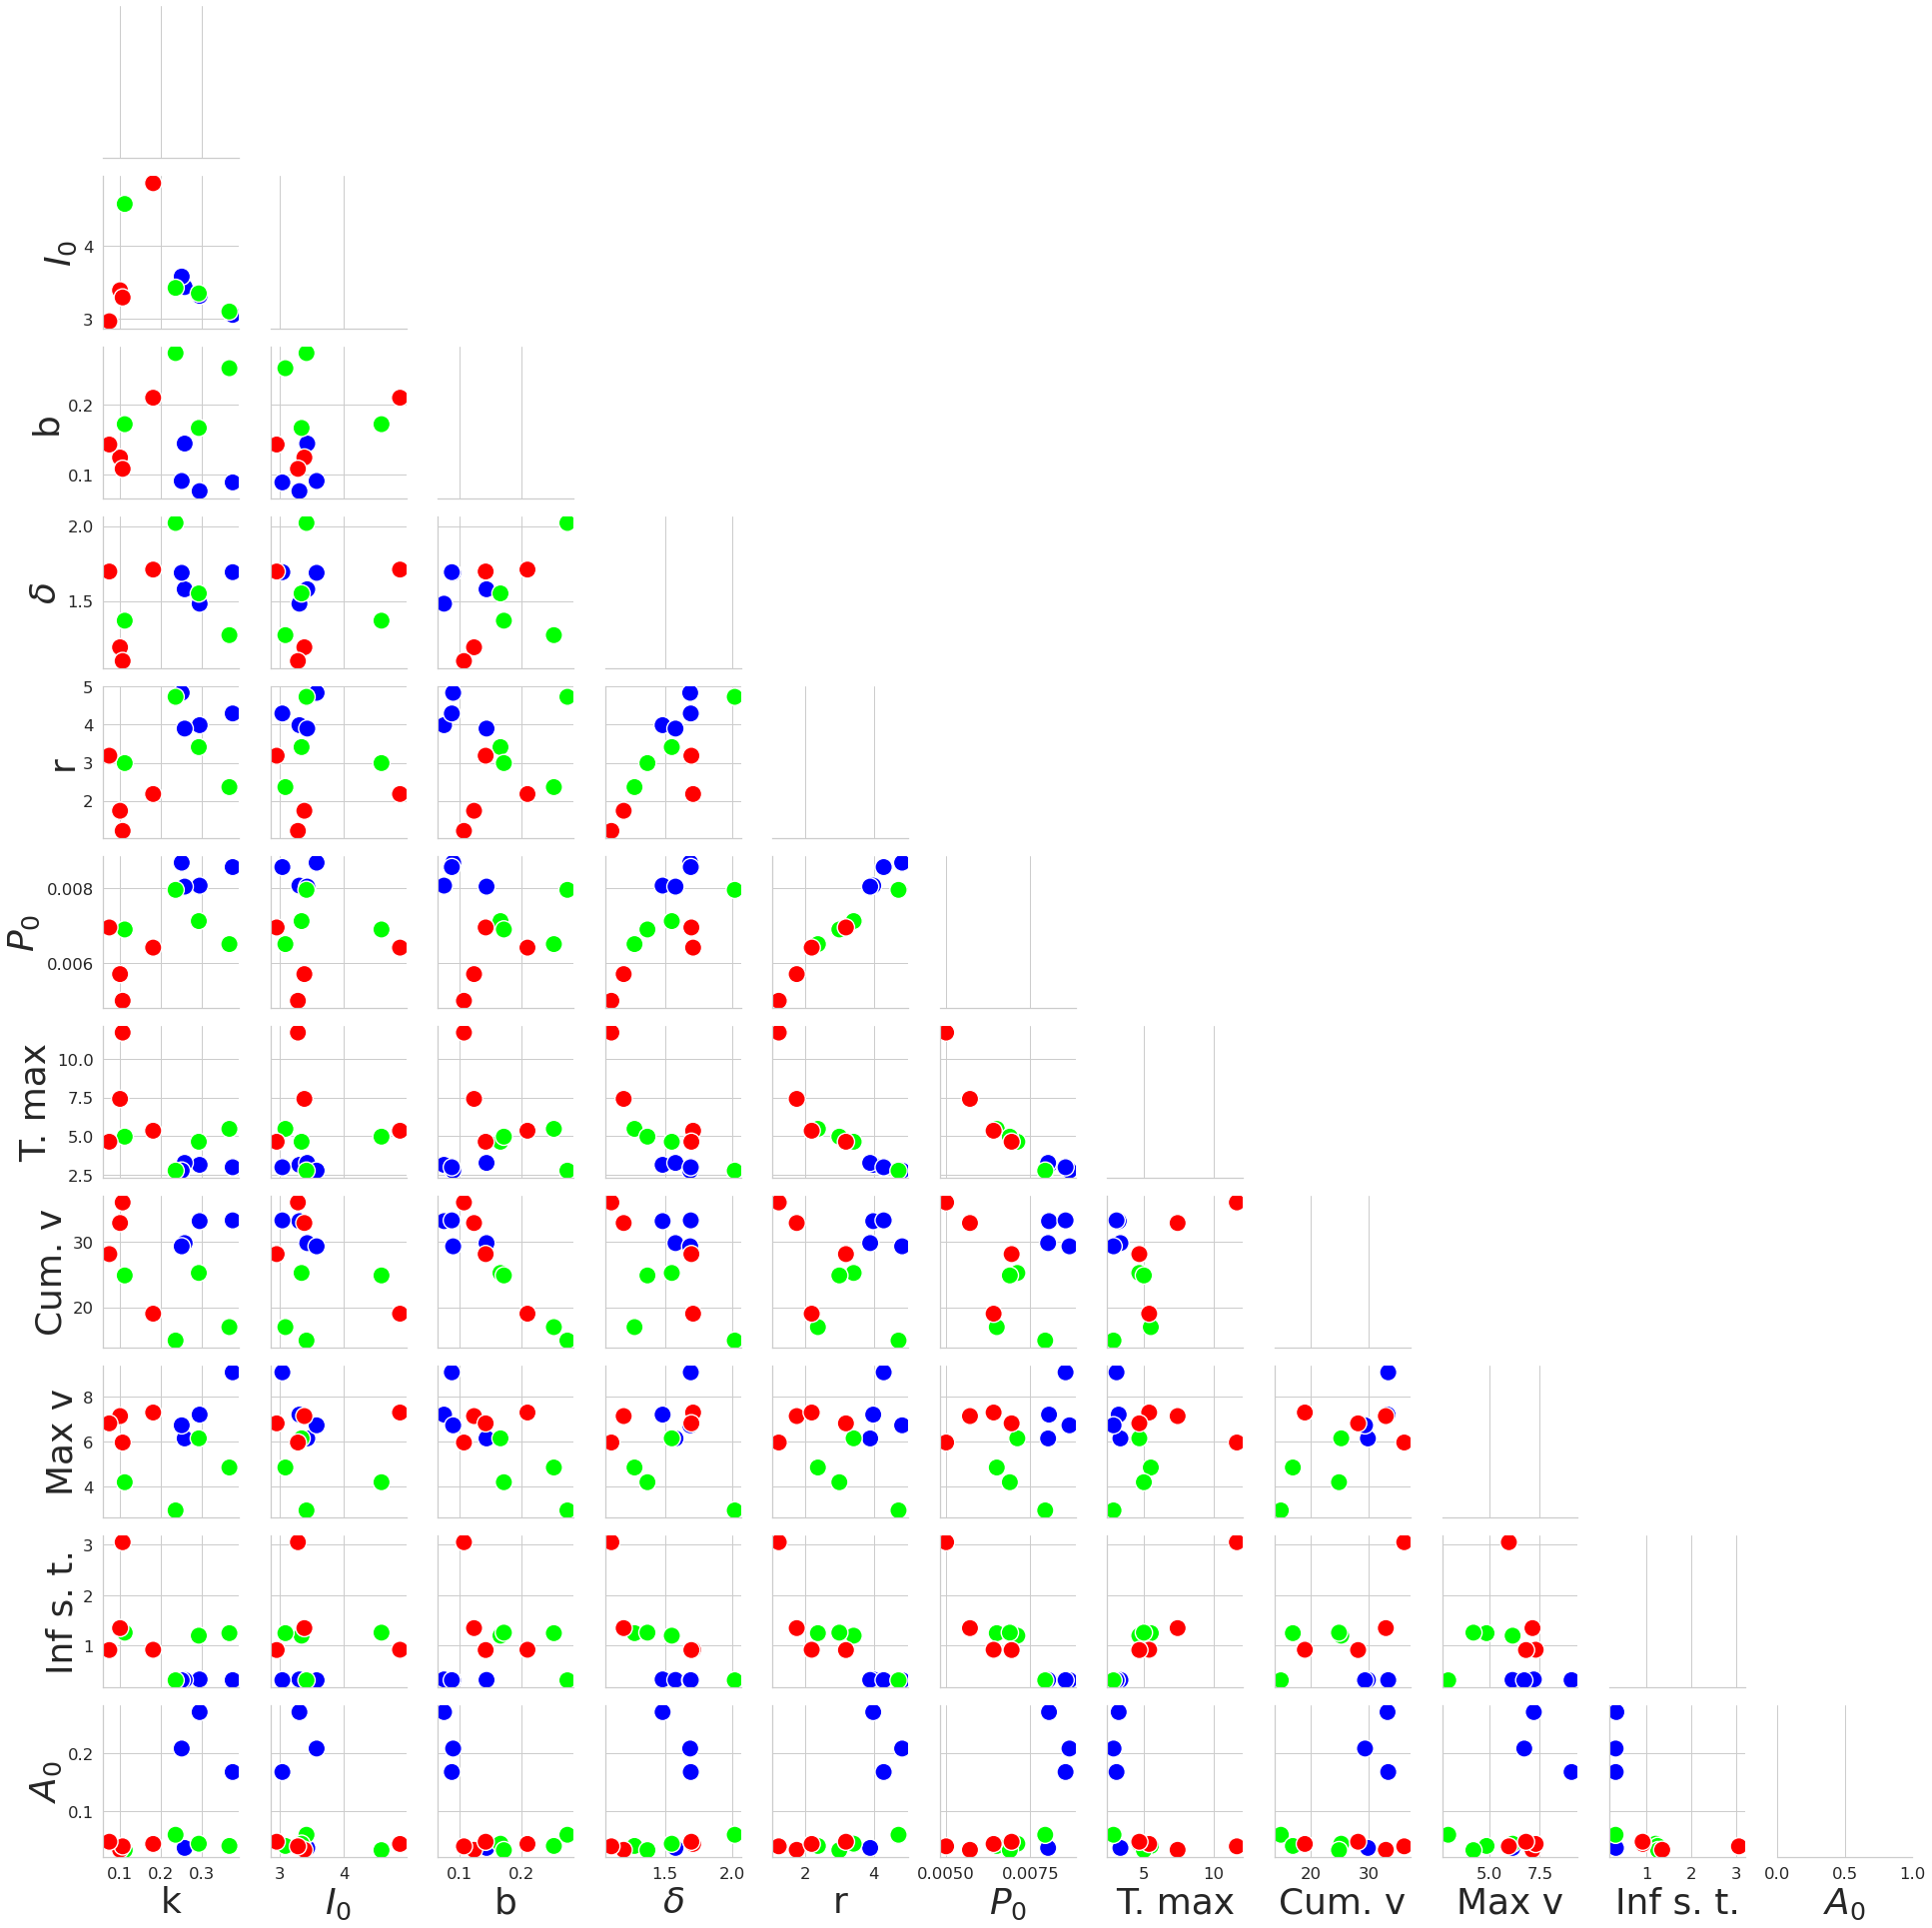

In [3]:
# pair plot for median parameters 
sns.set(rc={"figure.figsize":(5, 18)},style='whitegrid') 
sns.set_context("notebook", font_scale=1.5,rc={"axes.labelsize":36,"figure.figsize":(5, 5)})
#sns.set_context("paper", rc={"axes.labelsize":36})
h = sns.pairplot(dfMViral, hue = 'ID',palette=['#0000ff','#00ff00','#ff0000'],corner=True,plot_kws = {"s":300},diag_kind='KDE')
h._legend.remove()
#h.axes[0,1].set_xlim((dfMViral['k'].min(),dfMViral['k'].max()))
#g.axes[1,2].set_xlim((-20,20))
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

h.map_diag(hide_current_axis)

plt.show()

<AxesSubplot:>

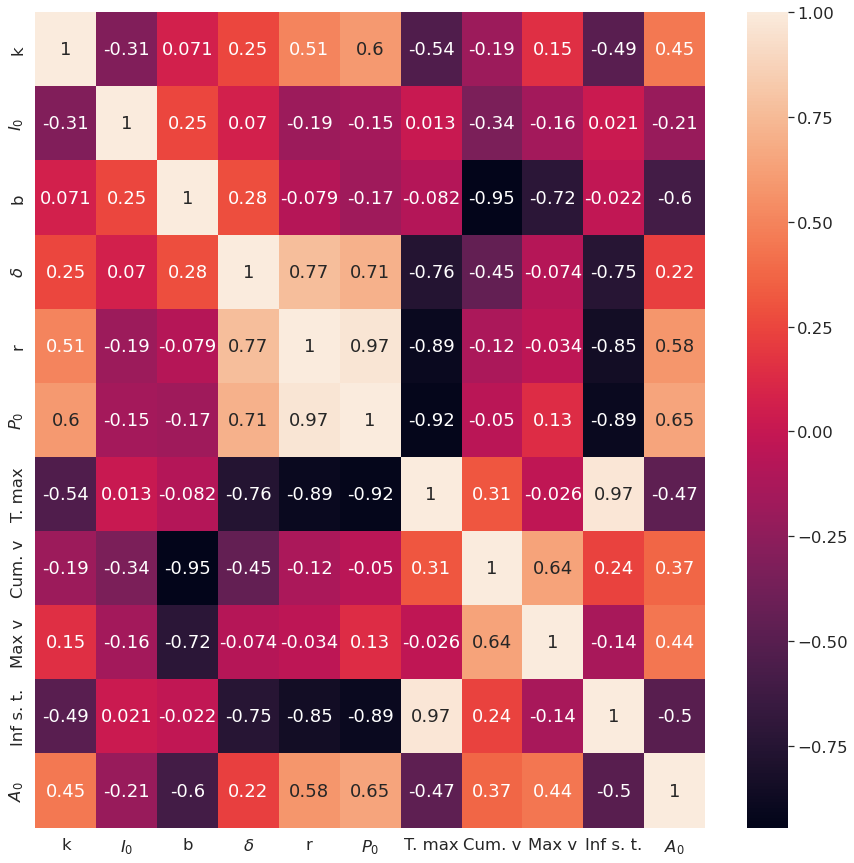

In [5]:
# correlation between model parameters 

plt.figure(figsize=(15,15))
sns.heatmap(dfMViral.corr(),annot=True)

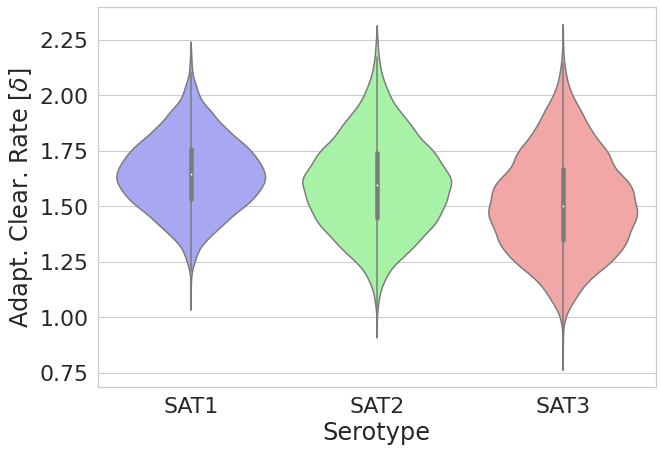

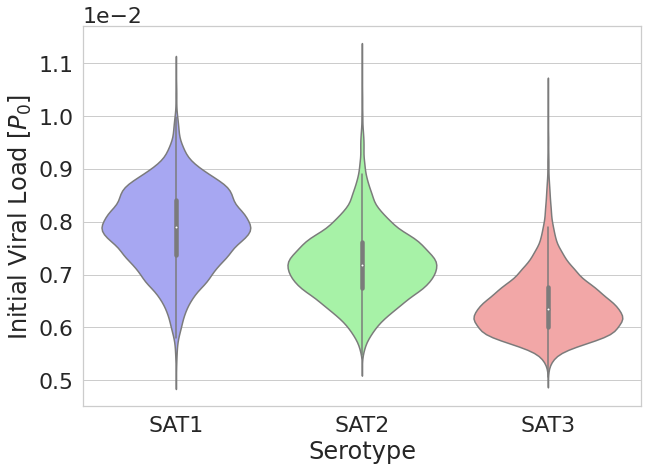

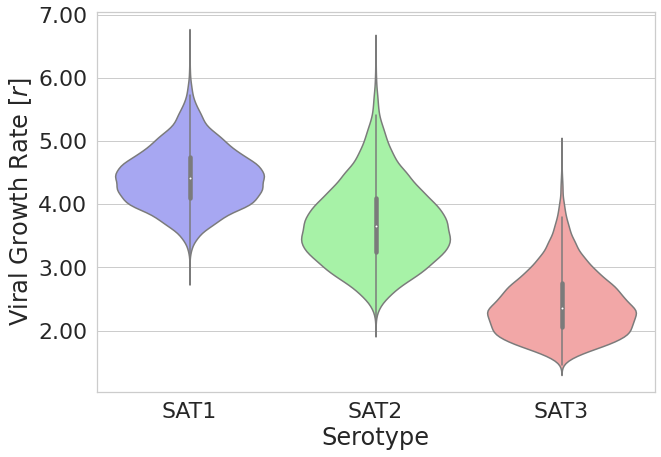

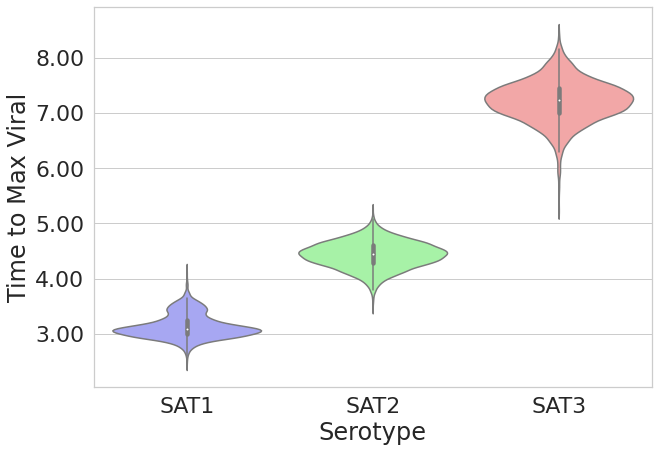

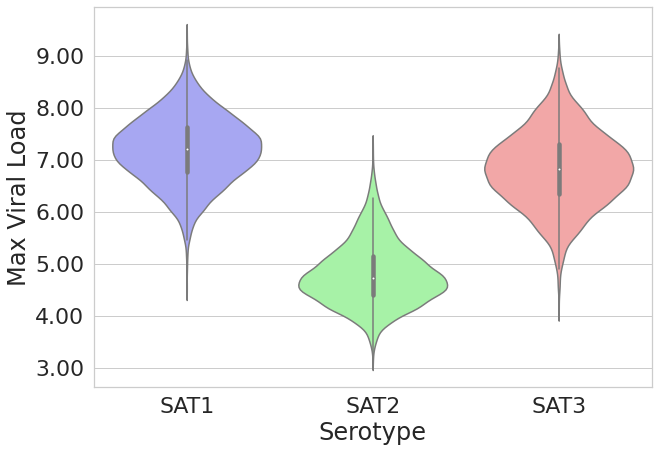

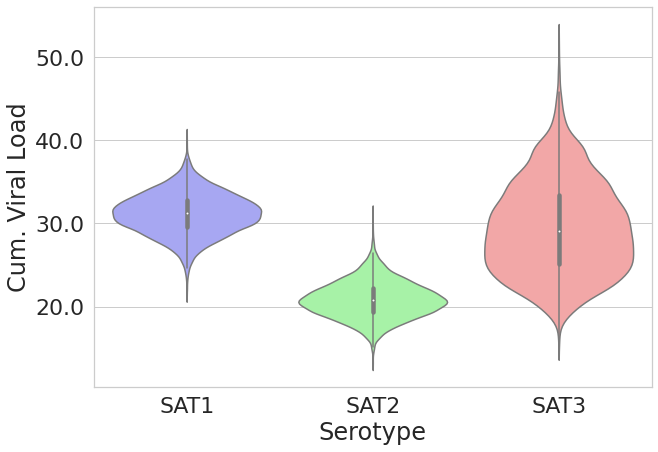

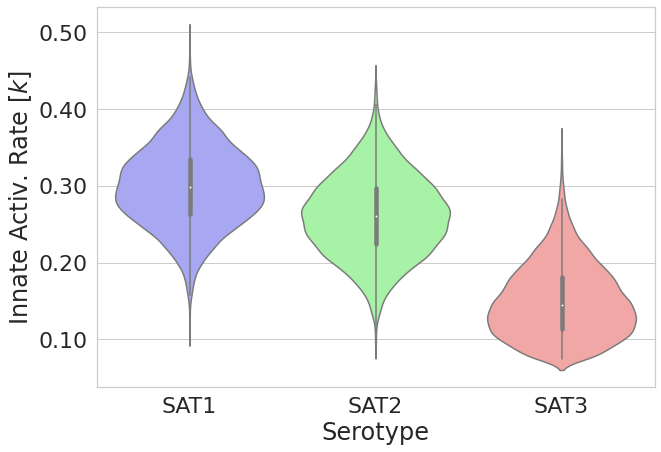

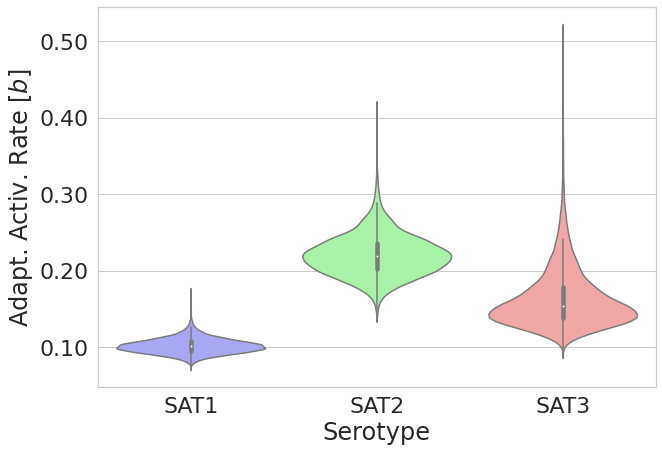

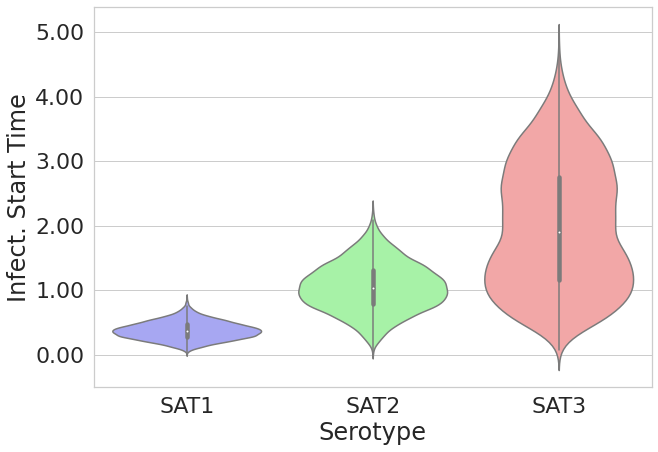

In [6]:
#



sns.set(rc={"figure.figsize":(10, 7)},style='whitegrid') 

from matplotlib.ticker import FormatStrFormatter

sns.set(font_scale = 2,style="whitegrid")
h = sns.violinplot(data=dfM, x="ID", y="delta",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False, 
                   
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Adapt. Clear. Rate [$\delta$]" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

h = sns.violinplot(data=dfM, x="ID", y="P0",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Initial Viral Load [$P_0$]" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.ticklabel_format(style='sci',scilimits=[-2,5], axis='y')
#plt.figure(figsize=(11,22))
plt.show()

h = sns.violinplot(data=dfM, x="ID", y="r",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Viral Growth Rate [$r$]" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()


h = sns.violinplot(data=dfM, x="ID", y="tmax",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Time to Max Viral" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

h = sns.violinplot(data=dfM, x="ID", y="vmax",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Max Viral Load" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()


h = sns.violinplot(data=dfM, x="ID", y="cumviral",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Cum. Viral Load" , size = 24 ) 
#h.ax_joint.set_xbel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.show()


h = sns.violinplot(data=dfM, x="ID", y="k",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Innate Activ. Rate [$k$]" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()


h = sns.violinplot(data=dfM, x="ID", y="b",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Adapt. Activ. Rate [$b$]" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=24)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

h = sns.violinplot(data=dfM, x="ID", y="start",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Infect. Start Time" , size = 24 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=24)
hh.remove()
#plt.figure(figsize=(11,22))
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()


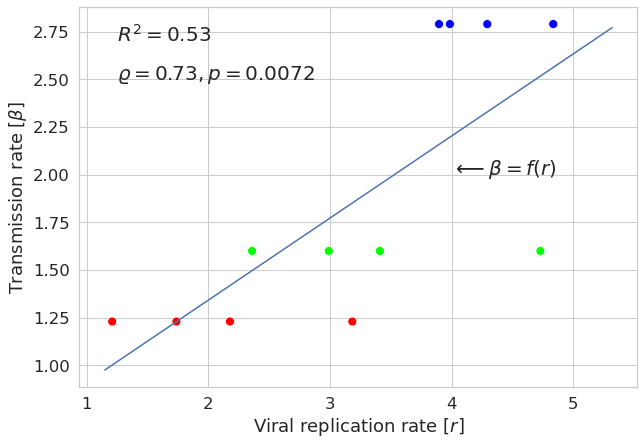

(0.7289602581902289, 0.007152642656038609)

In [9]:
sns.set(font_scale = 1.5,style="whitegrid")


h=sns.scatterplot(data = dfInd, x = (dfInd['r']),y = dfInd['Transmission'],palette=['#0000ff','#00ff00','#ff0000'],hue=dfInd['Serotype'],s=80)
# plt.xlabel(r'viral replication rate [r]')
plt.gca().legend_.remove()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = (dfInd['r']).values
X = X.reshape(-1,1)
XX = np.linspace(.95*X.min(),1.1*X.max()).reshape(-1,1)
y = dfInd['Transmission'].values
reg = LinearRegression().fit(X, y)
plt.plot(XX,reg.predict(XX))
h.set_xlabel( r"Viral replication rate [$r$]" ) 
h.set_ylabel( r"Transmission rate [$\beta$]") 
plt.text(1.25, 2.7, '$R^2 = 0.53$',fontsize=20)
plt.text(1.25, 2.5, r'$\varrho = 0.73, p = 0.0072$',fontsize=20)
plt.text(4,2,r'$\longleftarrow \beta = f(r)$',fontsize=20)
# plt.text(3,2,r'$\downarrow$',fontsize=20)
plt.show()
r2_score(y, reg.predict(X))
stats.pearsonr(dfInd['r'],dfInd['Transmission'])

0.3708180435533176


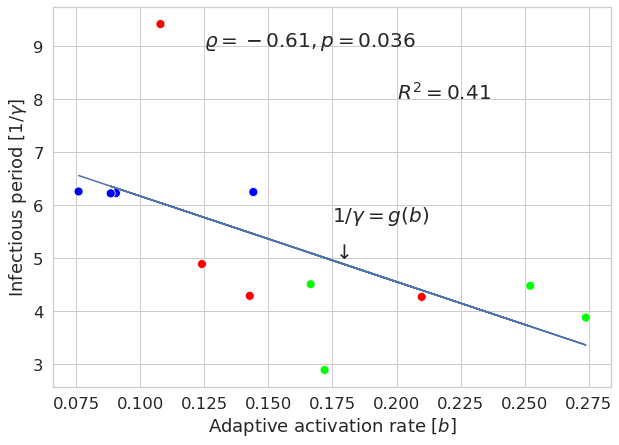

(-0.6089483094264386, 0.035590836151245496)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set(font_scale = 1.5,style="whitegrid")
X = dfInd['b'].values
X = X.reshape(-1,1)
y = dfInd['infectPeriod'].values
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X))
print(r2_score(y, reg.predict(X)))
# sns.set_context("paper", rc={"axes.labelsize":20})
xs = np.linspace(np.min(dfInd['b']),np.max(dfInd['b']),20)
xs = xs.reshape(-1,1)
plt.xlabel(r'Adaptive activation rate [$b$]')
plt.ylabel(r'Infectious period [$1/\gamma$]')
#plt.plot(xs, reg.predict(xs),color='darkgray',linewidth=3)
s='1/γ = g(b)';
# plt.text(.5, 5.1, s, fontsize=16)
# plt.text(.65,6.0,'$R^2$= 0.67',fontsize=16)
s = r'''$\varrho = -0.61, p = 0.036$''';
plt.text(.125,9,s,fontsize=20)
h = sns.scatterplot(data=dfInd, x="b", y=dfInd["infectPeriod"],hue='Serotype',palette=['#0000ff','#00ff00','#ff0000'],s=80)
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.text(.175,5.7,r'$1/\gamma = g(b)$',fontsize=20)
plt.text(.175,5,r'$\downarrow$',fontsize=20)
plt.text(.2, 8, '$R^2 = 0.41$',fontsize=20)
plt.show()
print(stats.pearsonr(dfInd["b"],dfInd["infectPeriod"]))


0.3708180435533176


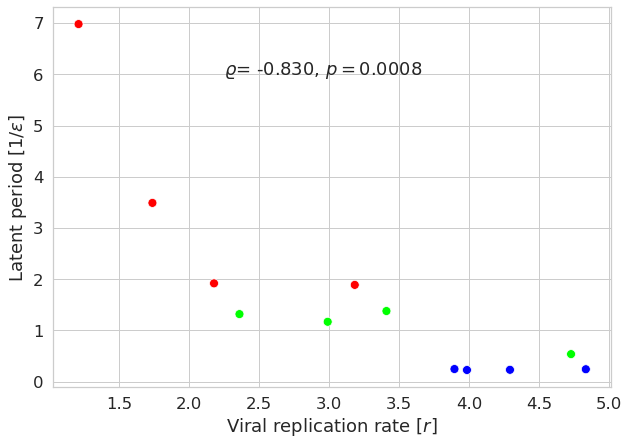

(-0.8304782328290239, 0.0008233019650781258)


In [11]:
X = X.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(r2_score(y, reg.predict(X)))

plt.xlabel(r'Viral replication rate [$r$]')
plt.ylabel(r'Latent period [$1/\epsilon$]')
#plt.plot(X, reg.predict(X),color='black',linewidth=3)
# s='1/γ = g(b)';
# plt.text(.5, 5.1, s, fontsize=16)
plt.text(2.25,6,r'$\varrho$= -0.830, $p = 0.0008$')
# plt.text(.4,5.25,r'$\longleftarrow\frac{1}{\gamma} = g(b)$')
# plt.text(.5,4.9,r'$R^2 = 0.404$')
h = sns.scatterplot(data=dfInd, x="r", y=dfInd["latentPeriod"],hue='Serotype',palette = ['#0000ff','#00ff00','#ff0000'],s=80)
plt.gca().legend_.remove()
plt.show()
print(stats.pearsonr(dfInd["r"],dfInd["latentPeriod"]))


In [14]:
rs = np.linspace(1,6,100)
bs = np.linspace(0.075,0.465,100)
r, b = np.meshgrid(rs, bs)

r0s = (0.4307*r + 0.4804)*(-16.16*b + 7.788)

/tmp/ipykernel_100814/1443658657.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


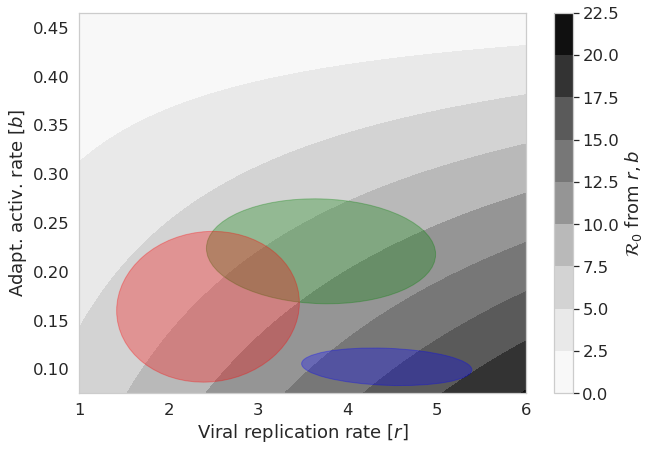

In [15]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
plt.contourf(r,b,r0s,cmap="Greys")
cbar = plt.colorbar()
cbar.set_label(r'$\mathcal{R}_0$ from $r,b$')

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

if __name__ == '__main__':
    #-- Example usage -----------------------
    # Generate some random, correlated data
    points = dfM[dfM['ID'] == 'SAT1'].copy()
    points = points[['r','b']].copy().values
    
    # Plot the raw points...
    x, y = points.T
    plt.plot(x, y, alpha=0)

    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='blue')
    
if __name__ == '__main__':
    #-- Example usage -----------------------
    # Generate some random, correlated data
    points = dfM[dfM['ID'] == 'SAT2'].copy()
    points = points[['r','b']].copy().values
    
    # Plot the raw points...
    x, y = points.T
    plt.plot(x, y, alpha=0)

    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='green')
    
if __name__ == '__main__':
    #-- Example usage -----------------------
    # Generate some random, correlated data
    points = dfM[dfM['ID'] == 'SAT3'].copy()
    points = points[['r','b']].copy().values
    
    # Plot the raw points...
    x, y = points.T
    plt.plot(x, y, alpha=0)
    plt.xlim([rs.min(),rs.max()])
    plt.ylim([bs.min(),bs.max()])
    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='red')
    plt.xlabel(r'Viral replication rate [$r$]')
    plt.ylabel(r'Adapt. activ. rate [$b$]')
    plt.show()